In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from skimage import io
import numpy as np 

plt.rcParams["font.family"] = ""

In [2]:
track_df = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/track_df_updated.pkl')
filtered_tracks = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/filtered_tracks.pkl')

In [3]:
track_df.head()

frame  index   amplitude  mu_x   mu_y  mu_z  sigma_x  sigma_y  sigma_z  \
0      0      0  206.593249  11.0   12.0   0.0      2.0      2.0      4.0   
1      0      1  191.000000  36.0   88.0   1.0      2.0      1.0      2.0   
2      0      2  231.007679  40.0  141.0   1.0      2.0      2.0      2.0   
3      0      3  185.152538  40.0   58.0   1.0      2.0      1.0      3.0   
4      0      4  202.000000  46.0   73.0   1.0      2.0      2.0      3.0   

   frame_y  ...  track_id      c2_amp  c2_peak  c2_peak_x  c2_peak_y  \
0        0  ...         0  122.947826    152.0        9.0       14.0   
1        0  ...         1  116.233333    143.0       34.0       87.0   
2        0  ...         2  122.330000    142.0       41.0      142.0   
3        0  ...         3  117.626667    142.0       42.0       59.0   
4        0  ...         4  115.112000    141.0       45.0       74.0   

   c2_peak_z  c3_mean_amp  c2_peak_mean  c2_voxel_sum  c3_voxel_sum  
0        2.0   163.682353    125.500000         11295         13913  
1        2.0   138.233333    114.826667         20068         19928  
2        0.0   153.940000    122.853333         15316         22805  
3        0.0   141.280000    118.016667         14557         20358  
4        3.0   147.768000    115.502857         23194         21963  

[5 rows x 21 columns]

In [4]:
filtered_tracks.head()

track_id  c2_peak     c3_peak  track_length  start_frame  end_frame  \
5         36    202.0  299.000000            34            0         33   
17        73    224.0  345.835302             8            0          7   
25        91    326.0  300.333333            21            0         20   
49       145    181.0  258.333333            20            0         19   
58       155    231.0  335.000000            12            0         11   

    peak_frame_c2  peak_start_c2  peak_frame_c3  peak_start_c3  
5              17             17             25             25  
17              6              6              6              6  
25             19             19             17             17  
49             14             14             10             10  
58              4              4              7              7

In [5]:
def random_track_ids(df, desired_length, num_to_select=16):
    """
    Randomly selects track_ids of a desired length from a DataFrame.

    Parameters:
    - df: DataFrame with 'track_id' and 'length' columns.
    - desired_length: The desired length of tracks to select.
    - num_to_select: The number of track_ids to randomly select (default is 16).

    Returns:
    - List of randomly selected track_ids.
    """
    # Filter the DataFrame for tracks with the desired length
    tracks_of_desired_length = df[(df['track_length'] >= desired_length[0]) & 
                                  (df['track_length'] <= desired_length[1]) ]

    # Determine the number of tracks available for the desired length
    num_tracks_available = len(tracks_of_desired_length)

    # Determine the number of tracks to randomly select (minimum of num_to_select or available tracks)
    num_tracks_to_select = min(num_to_select, num_tracks_available)

    if num_tracks_to_select > 0:
        # Randomly select track_ids
        selected_track_ids = np.random.choice(tracks_of_desired_length['track_id'], num_tracks_to_select, replace=False)
        return selected_track_ids
    else:
        print(f"No tracks of length {desired_length} available.")
        return []

In [6]:
selected_tracks = random_track_ids(filtered_tracks, desired_length = [10,20], num_to_select=64)

In [7]:
selected_tracks

array([11504,  9917,  8714,  6468, 11284,  5095, 10264, 14452,  8279,
        8010,  5539, 12605,  8281,  2494,  3878,  6794,  9476,  4297,
        5383,  5152,  9165, 10951,  6007, 14477,  2098, 11617, 14258,
        5592,   198,  9434,   679,  9374,  3951,  2309, 15638,  7192,
        8255, 14500, 13029, 11036,   255, 13124,  7970, 15948,  4297,
       14325, 13382, 11063,   600,  9400, 11854,  8365,  2647,  8865,
        3902, 10609,  2612, 11879,  1390,  3877,  3255,  6946, 17651,
        4683])

# For track length 10-20

# Plotting Channel 2 and Channel 3 peaks

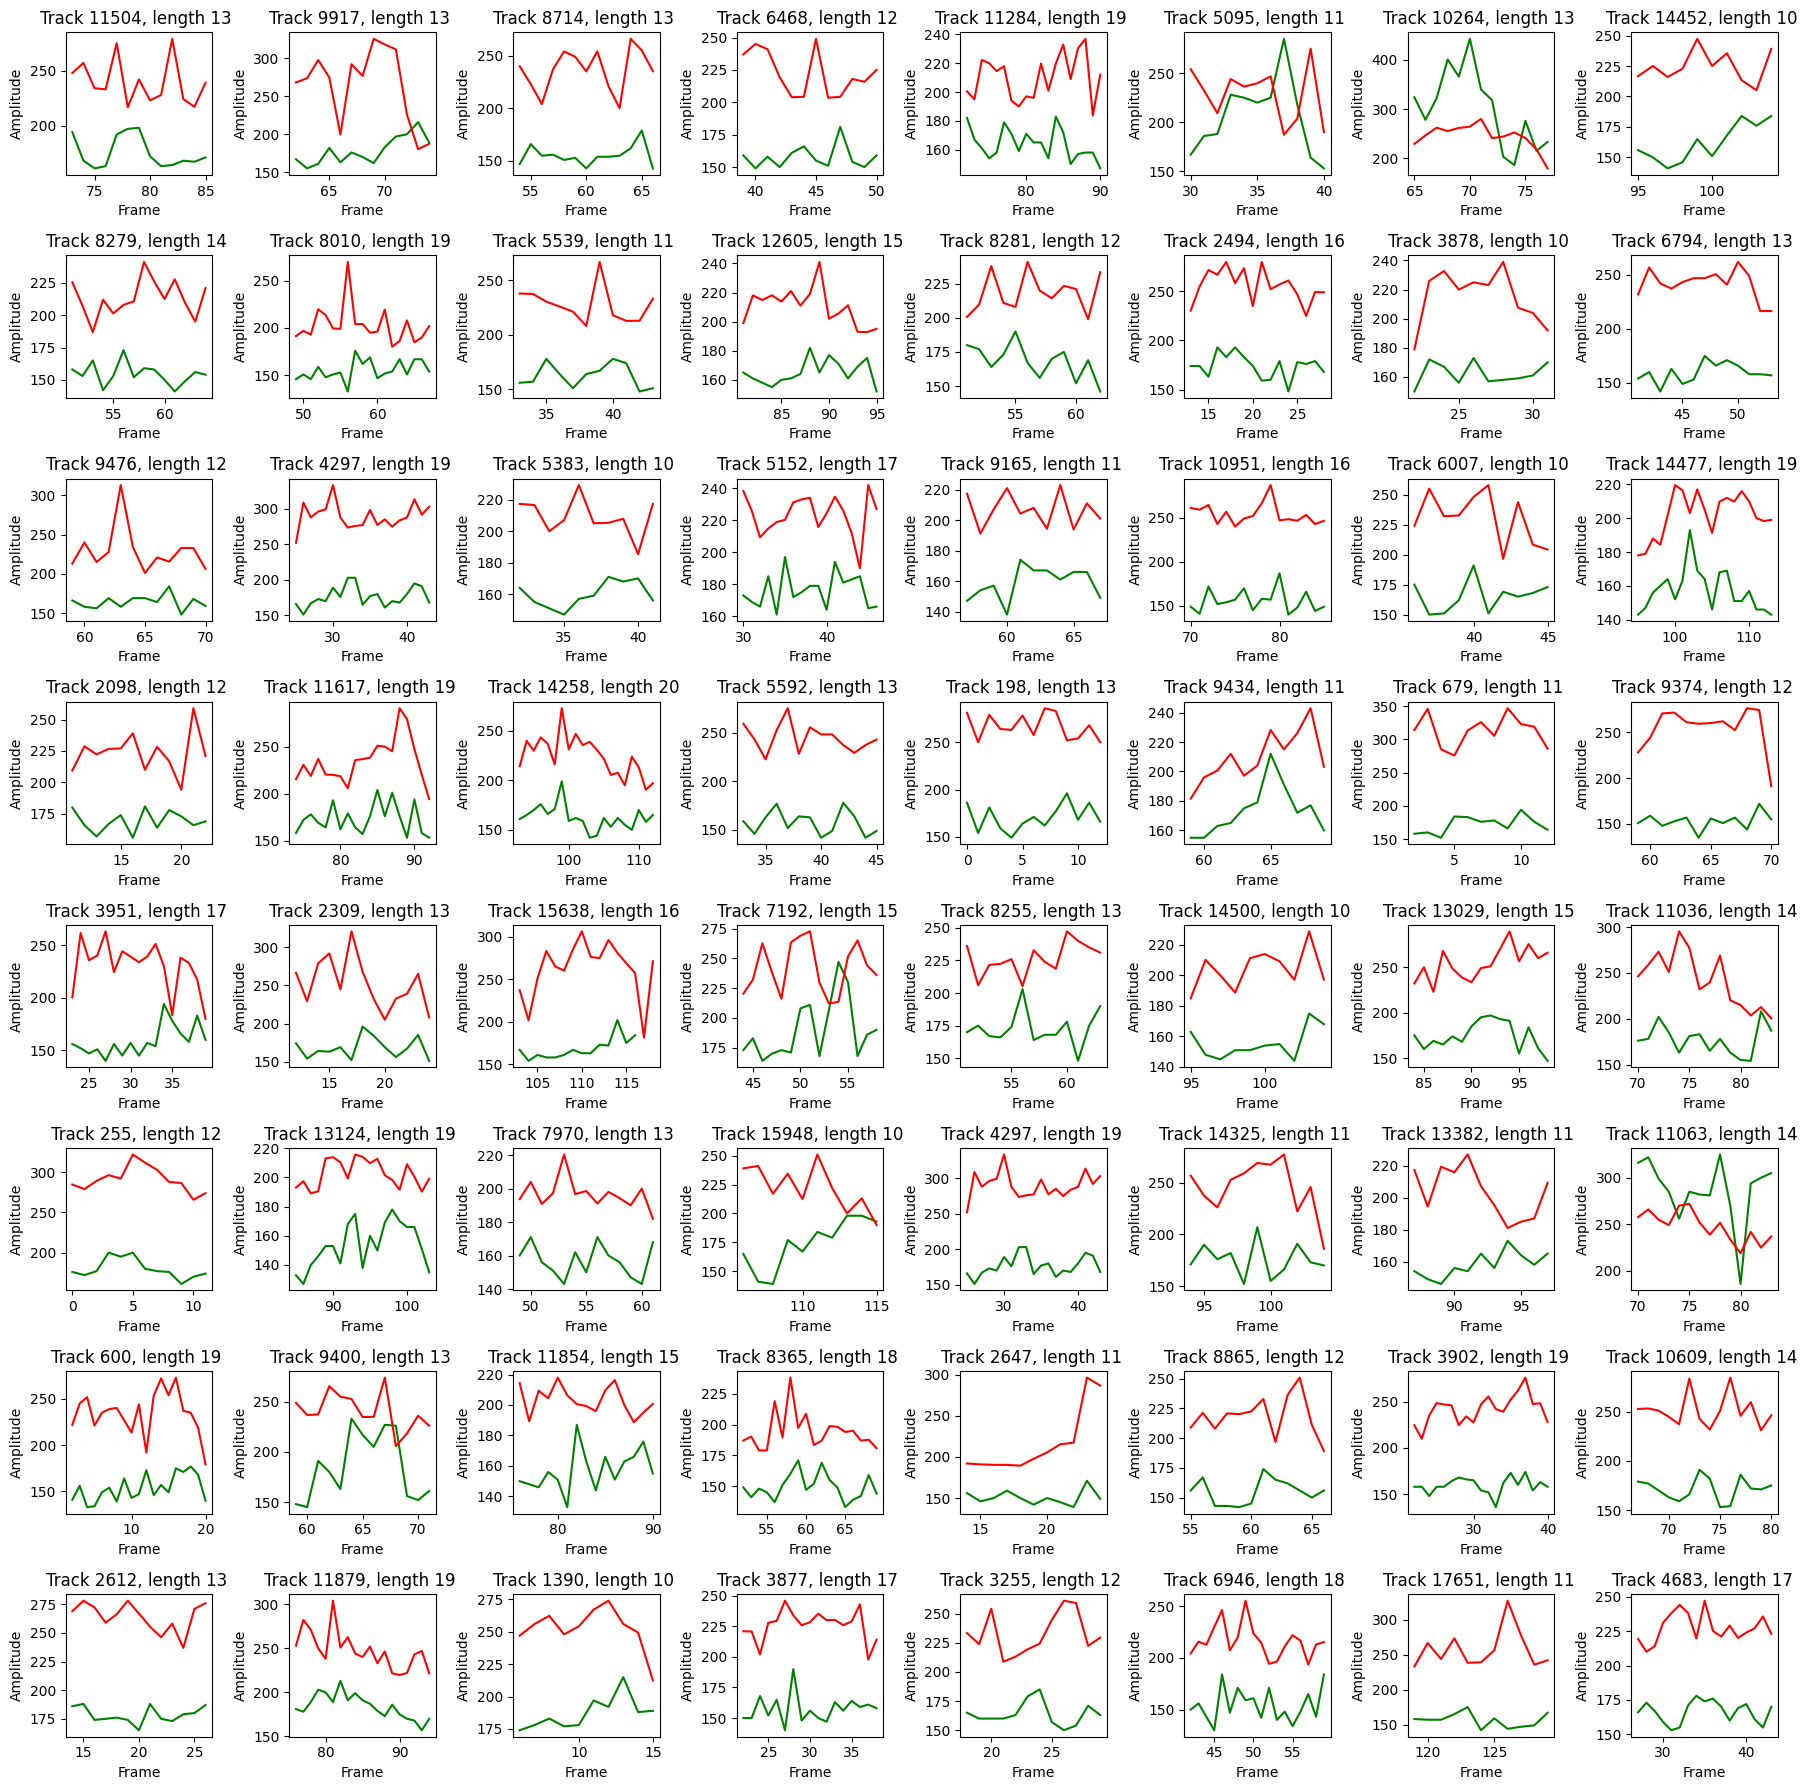

In [8]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_peak'], label='c2_peak', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['amplitude'], label='c3_peak', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]} ')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Plotting Channel 2 and Channel 3 means 

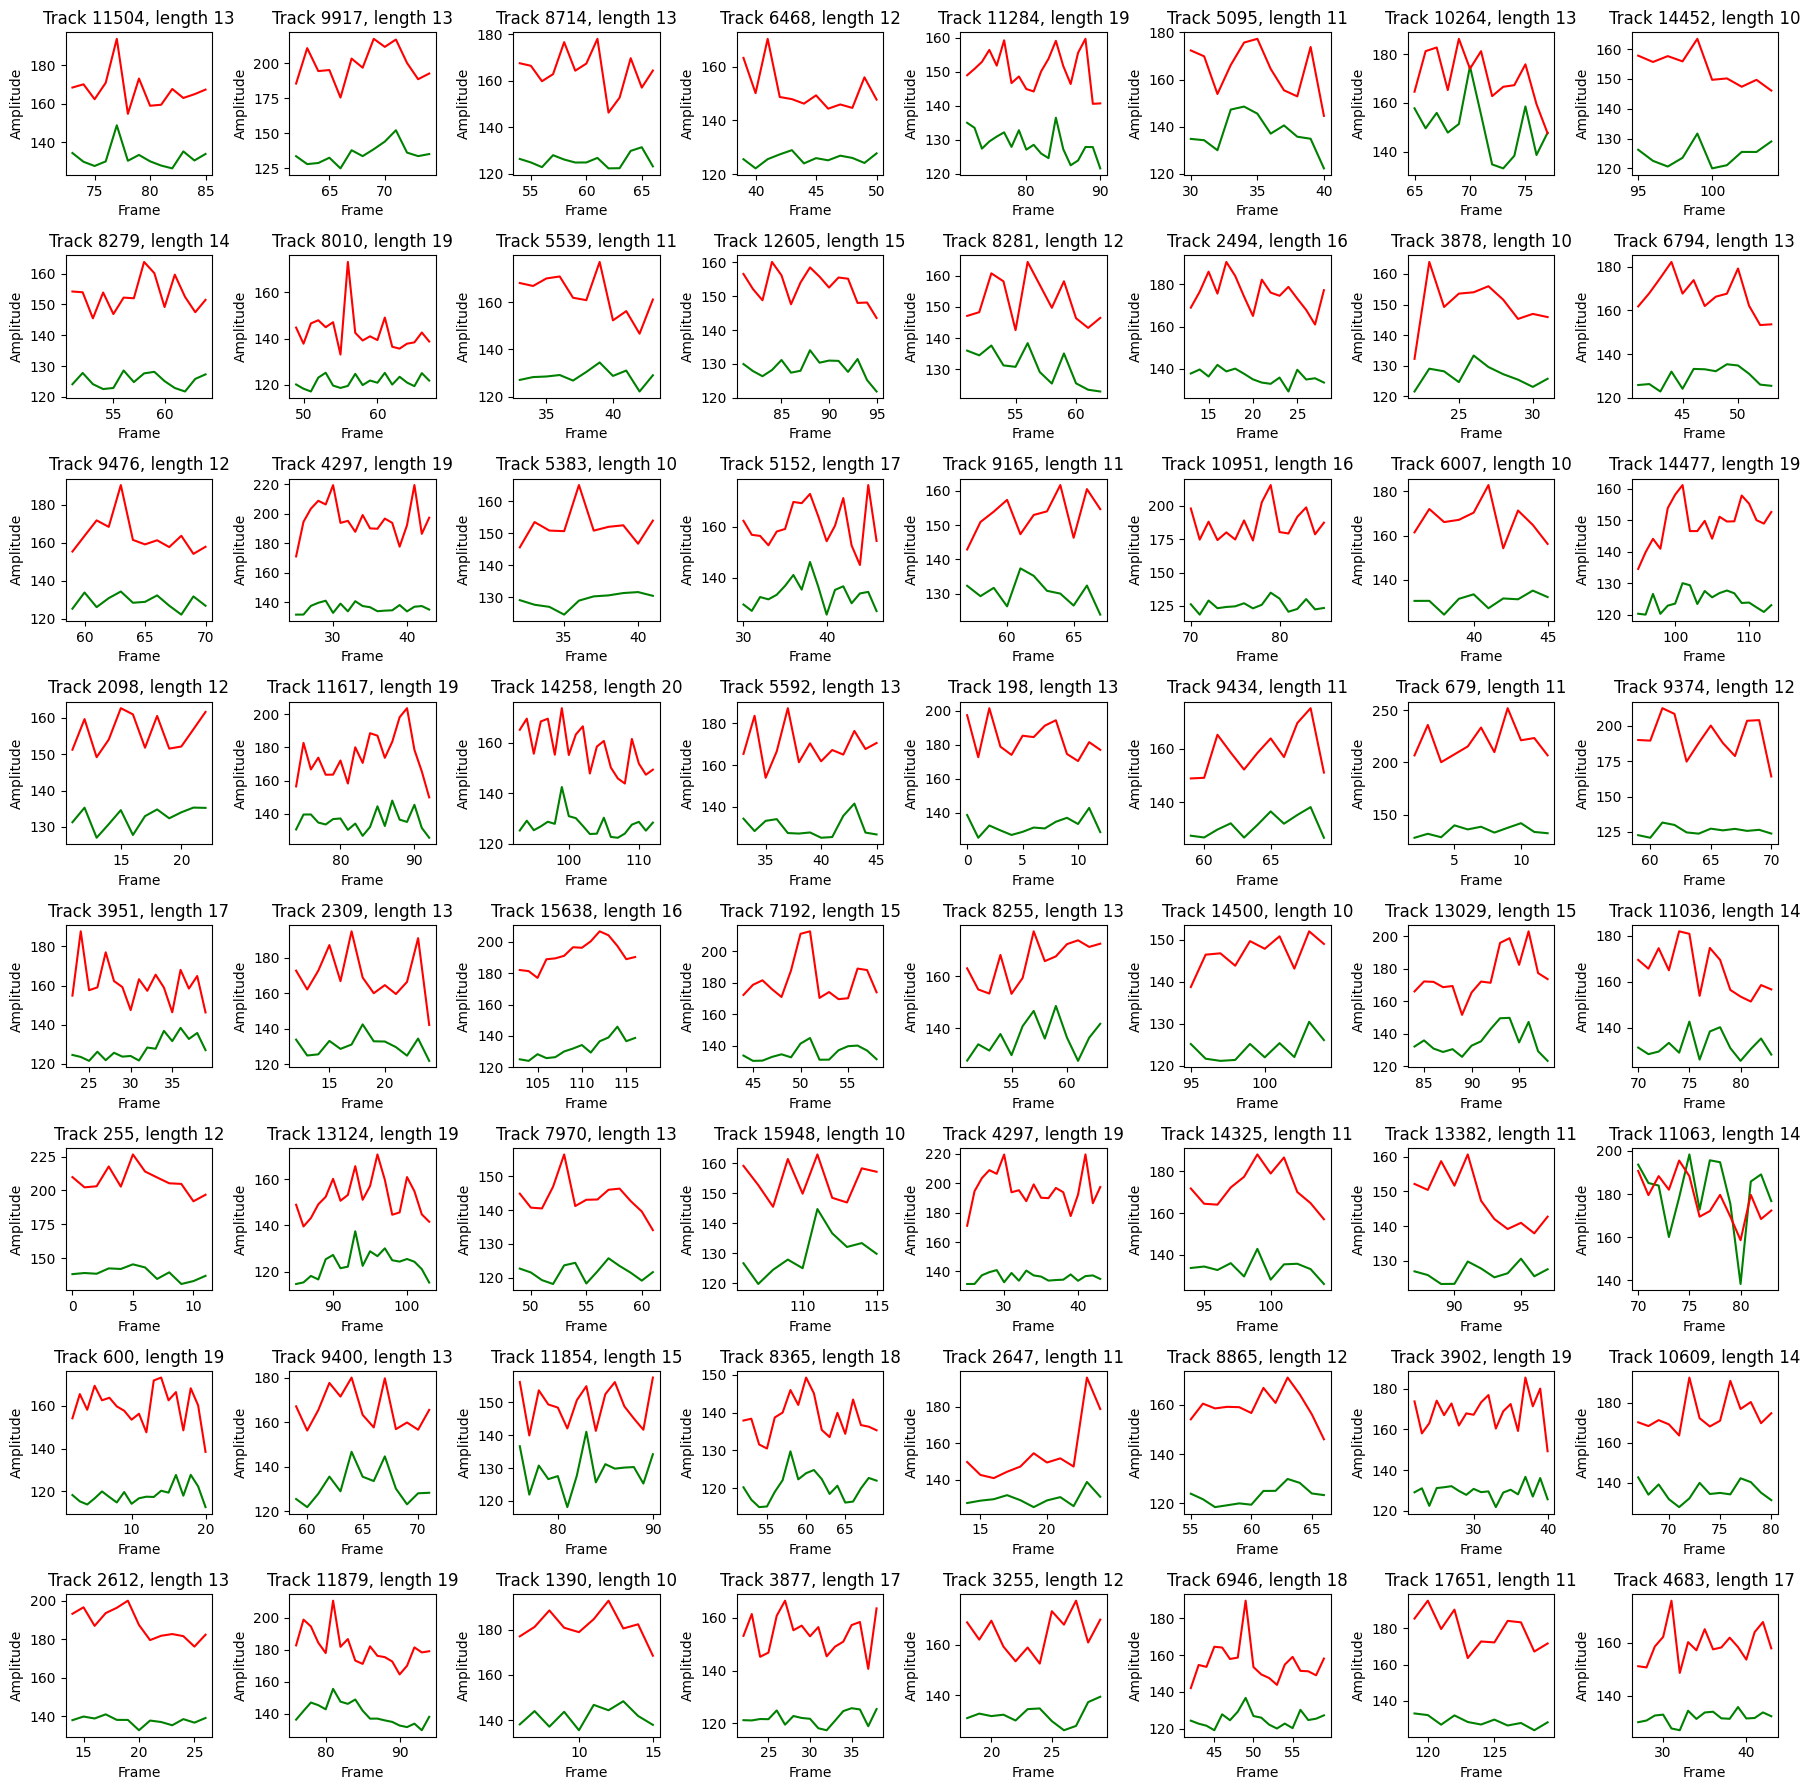

In [9]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Plotting Channel 2 and Channel 3 Voxel sums 

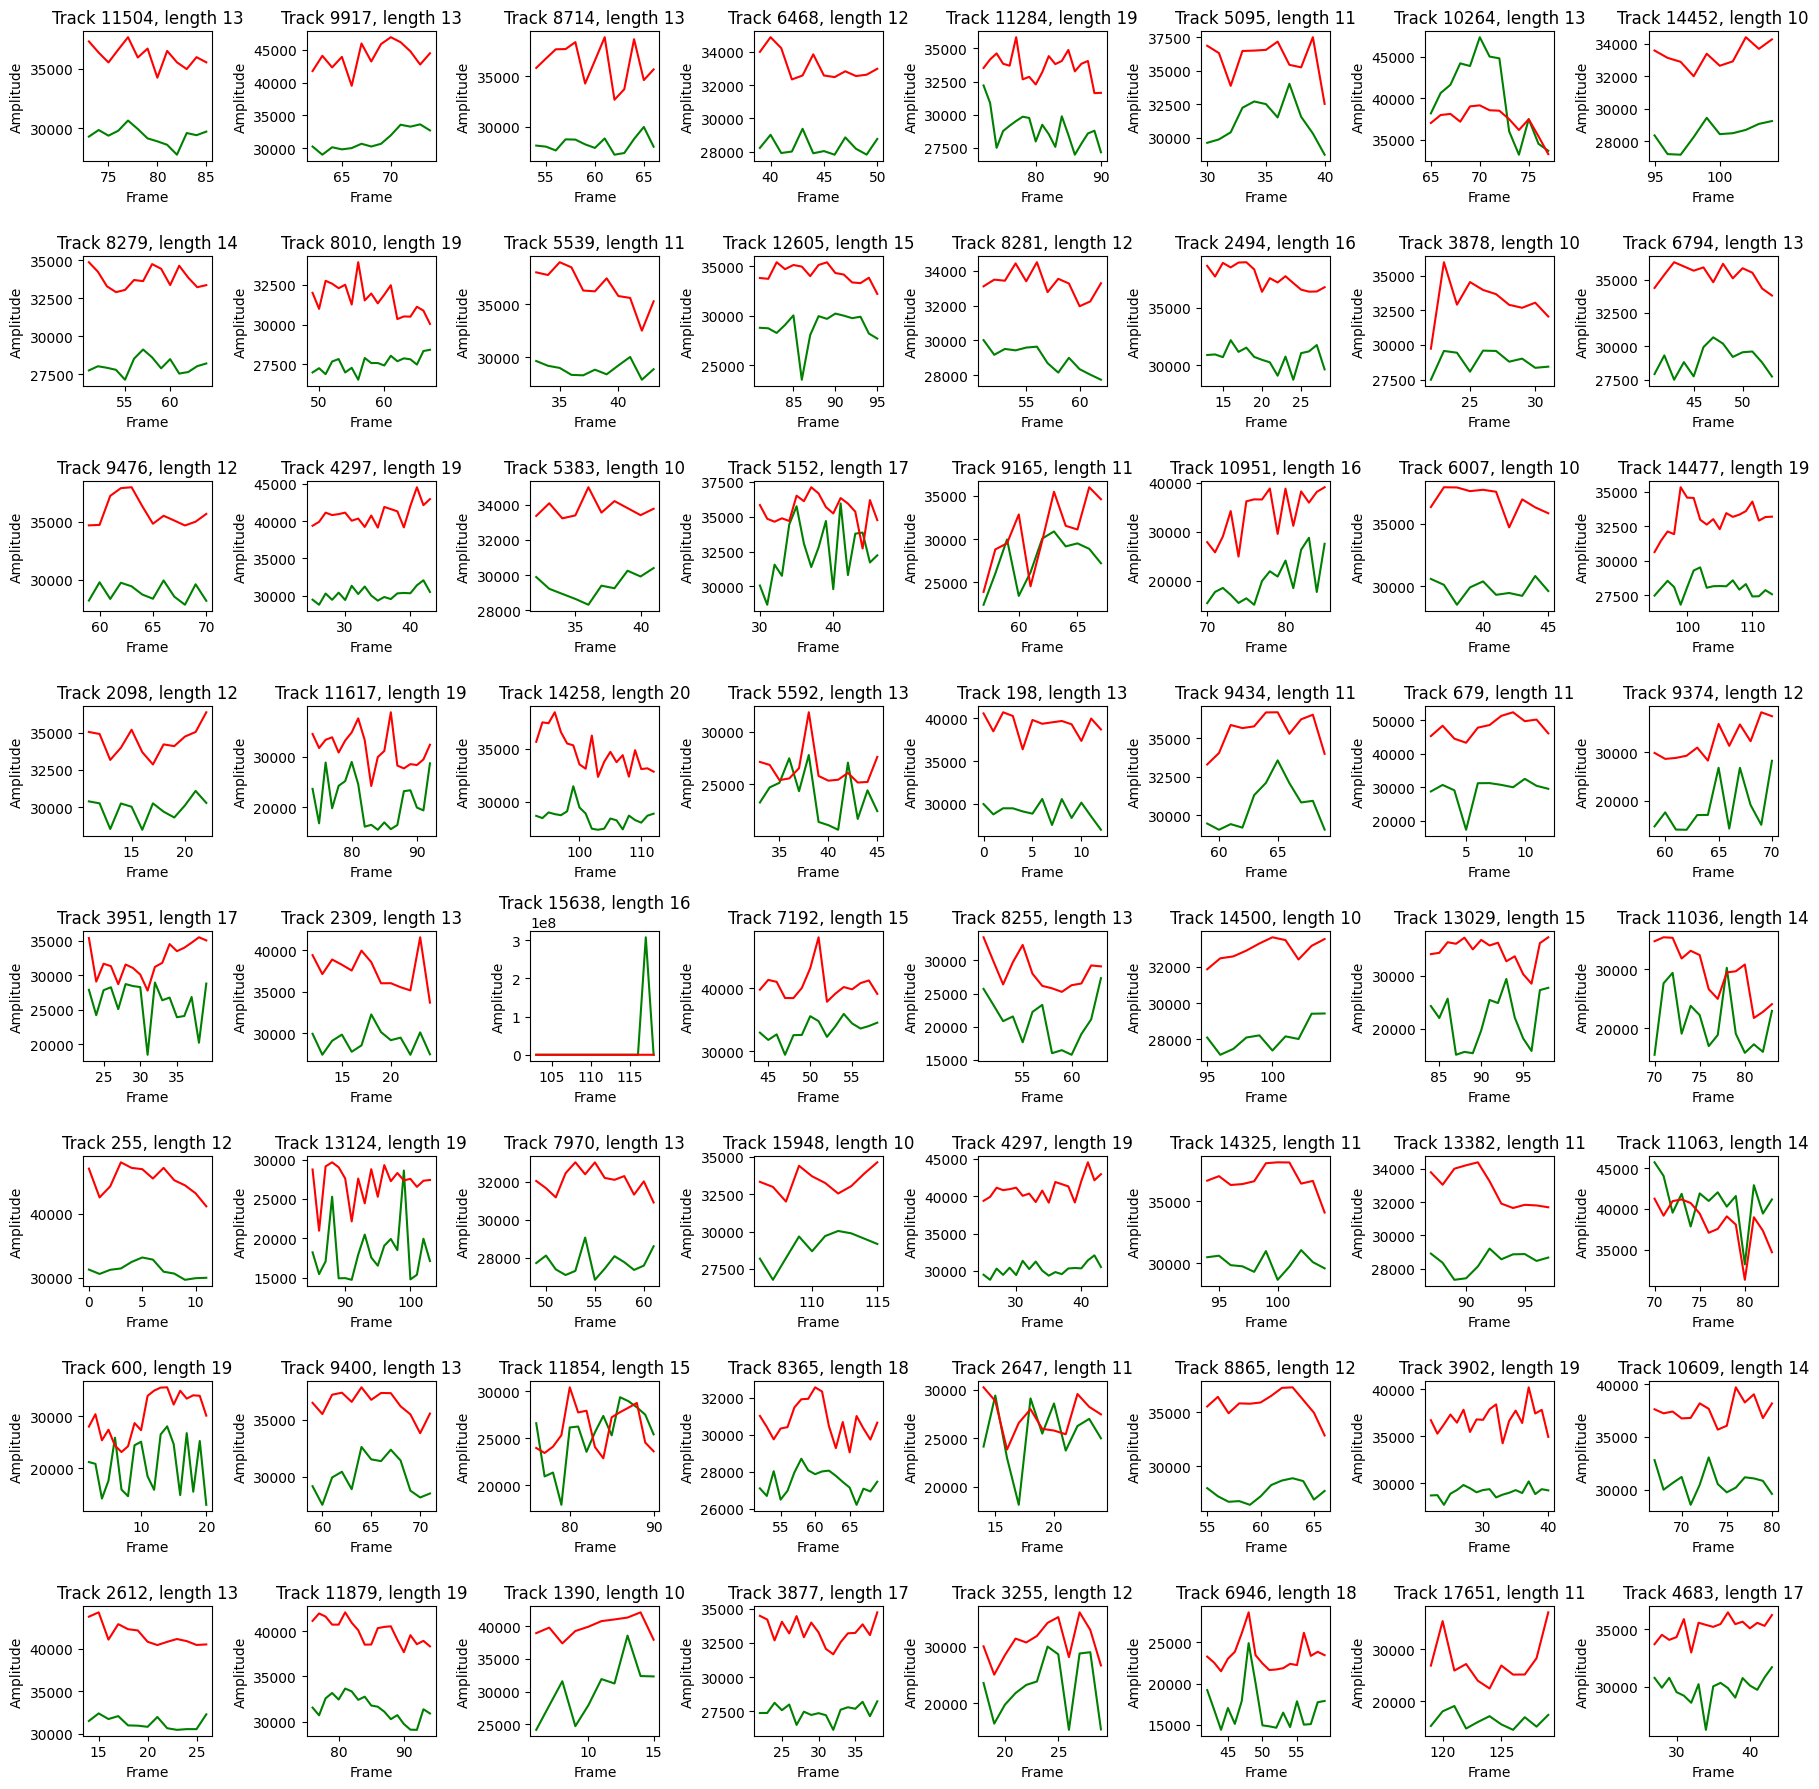

In [10]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_voxel_sum'], label='c2_voxel', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_voxel_sum'], label='c3_voxel', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# For track length 21-30

In [11]:
selected_tracks_medium = random_track_ids(filtered_tracks, desired_length = [21,30], num_to_select=64)
print(len(selected_tracks_medium))

60


# Peaks 

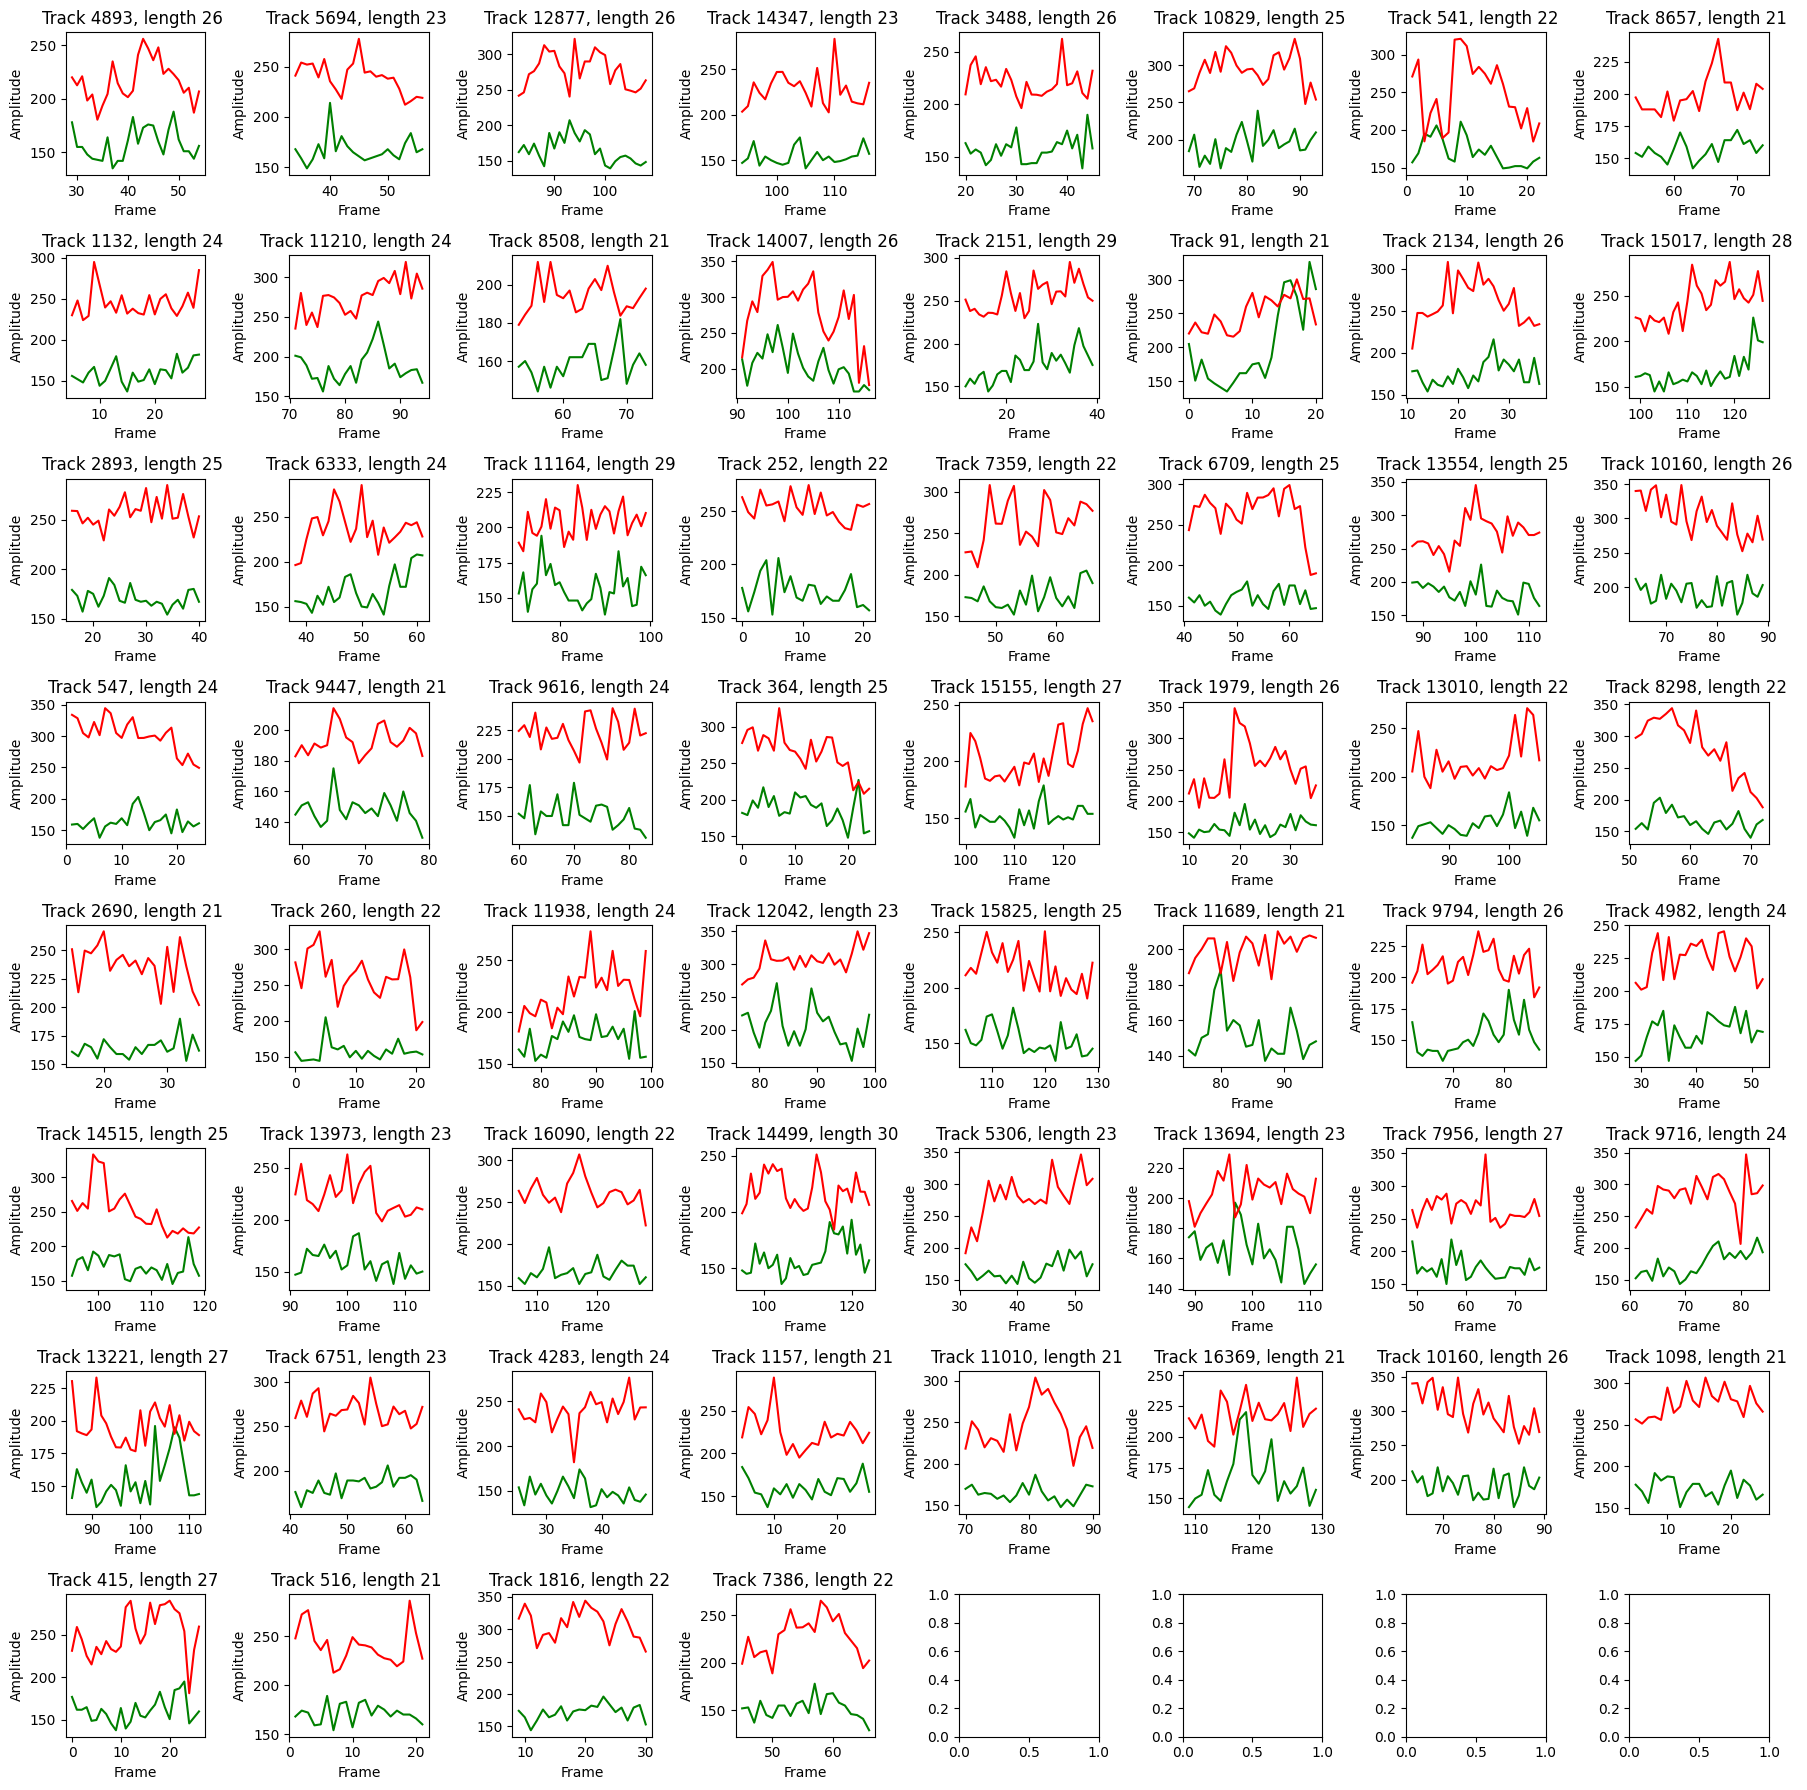

In [12]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_medium):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_peak'], label='c2_peak', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['amplitude'], label='c3_peak', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]} ')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Means 

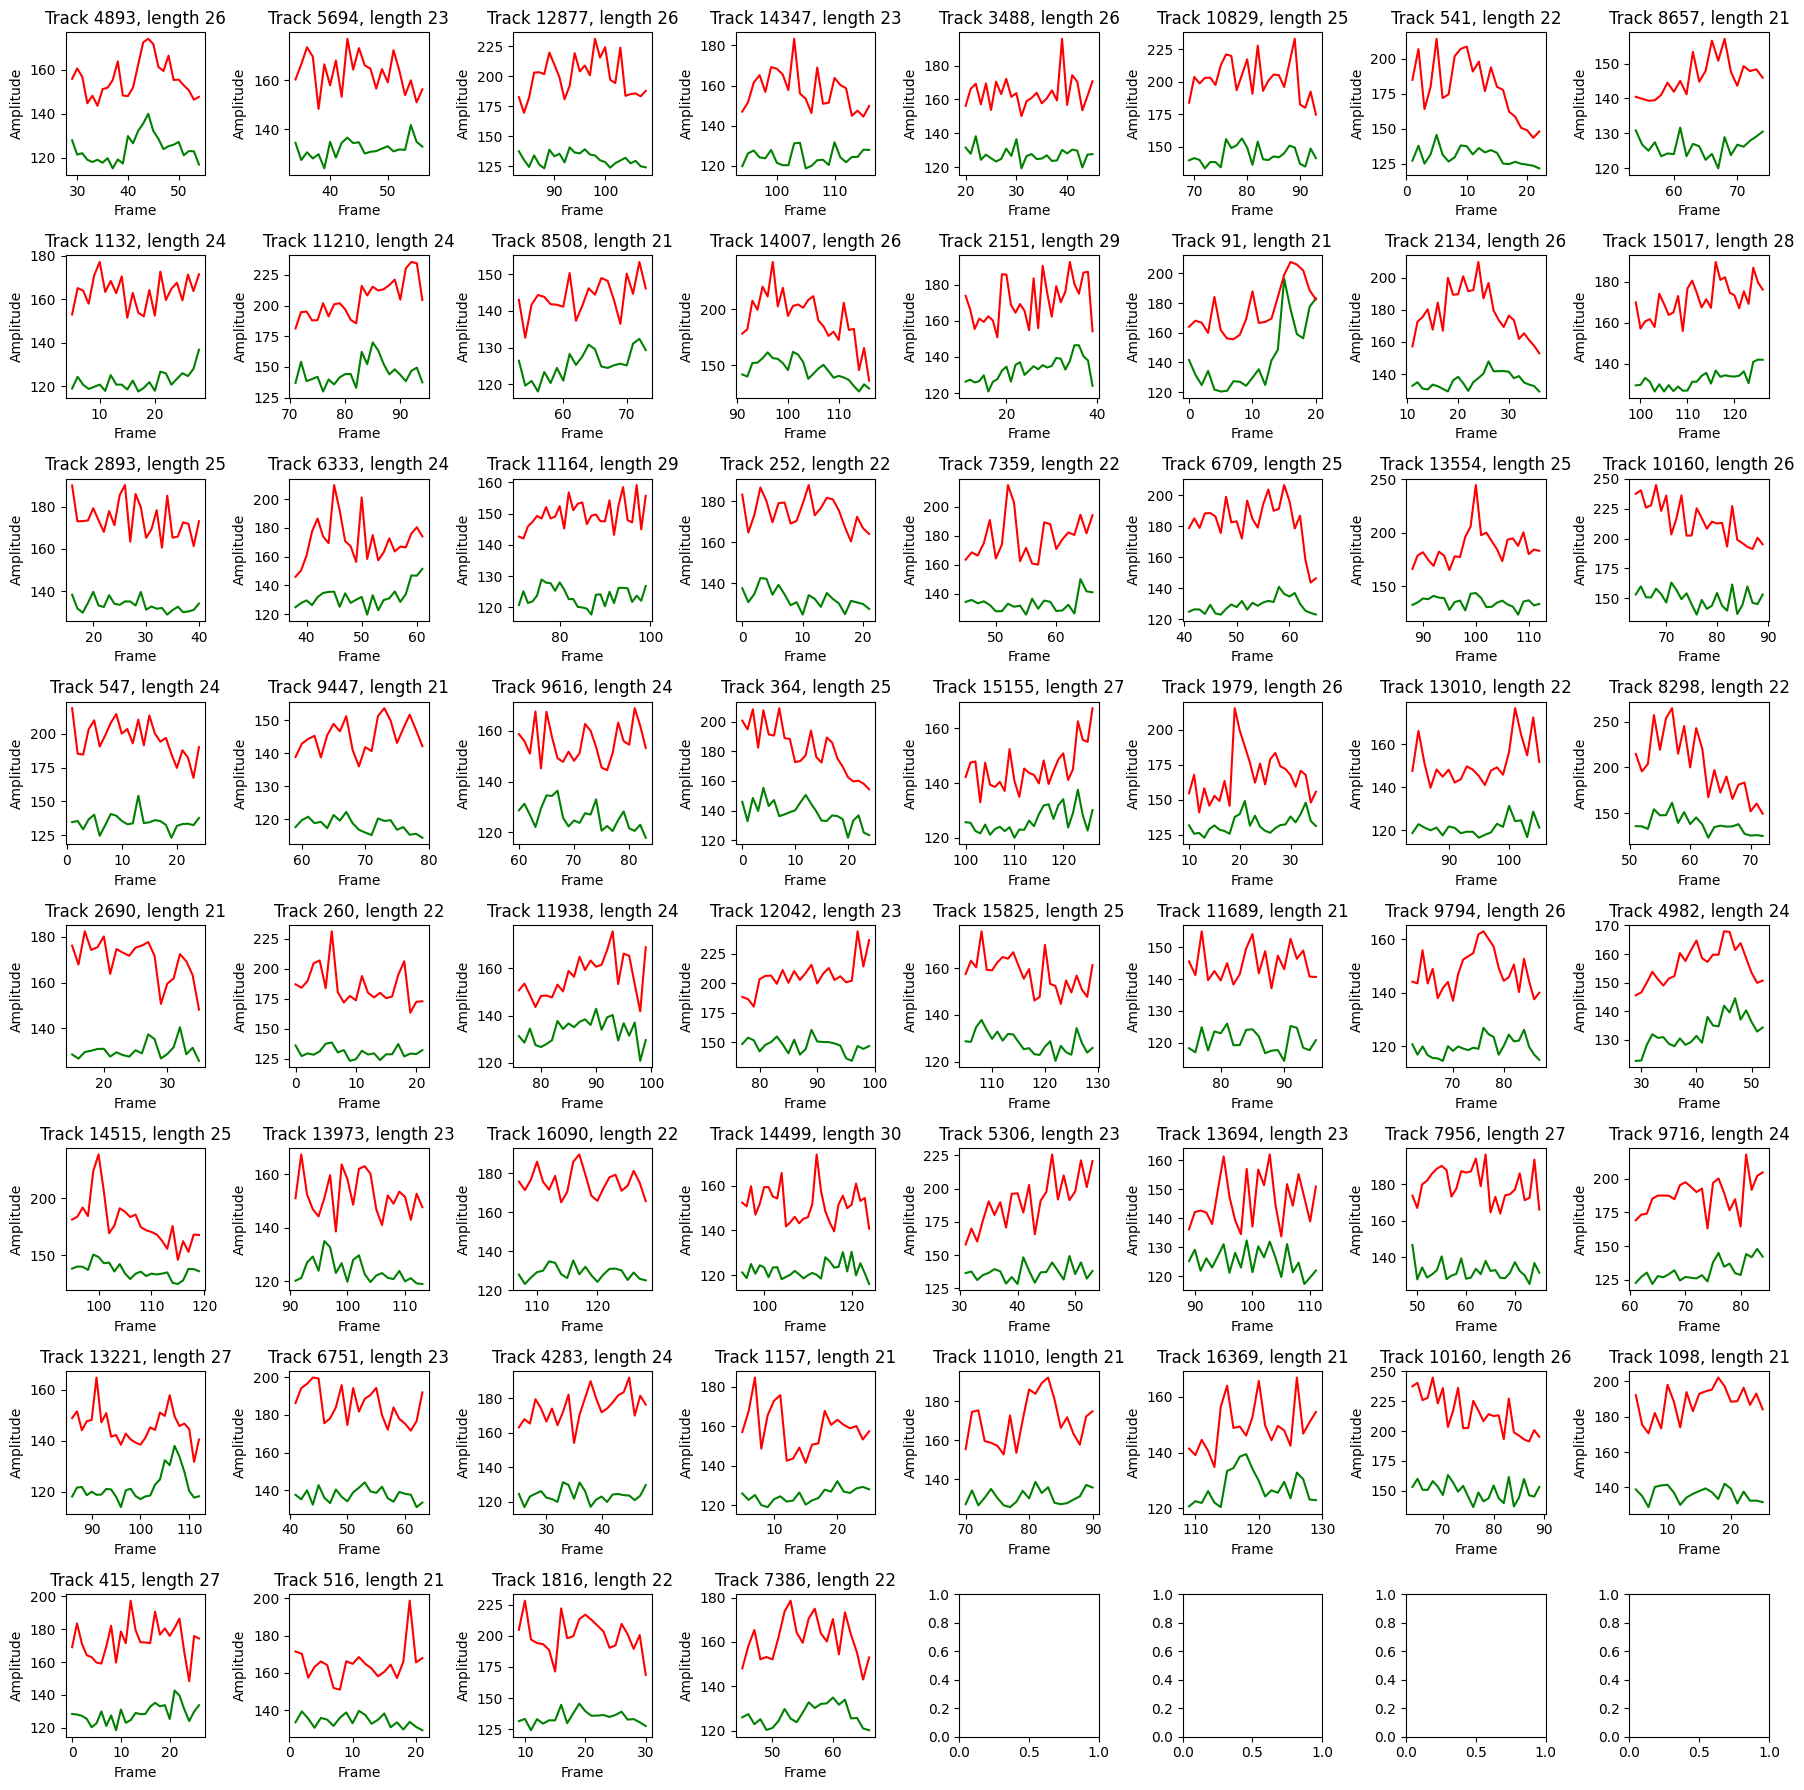

In [13]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_medium):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Voxel Sums

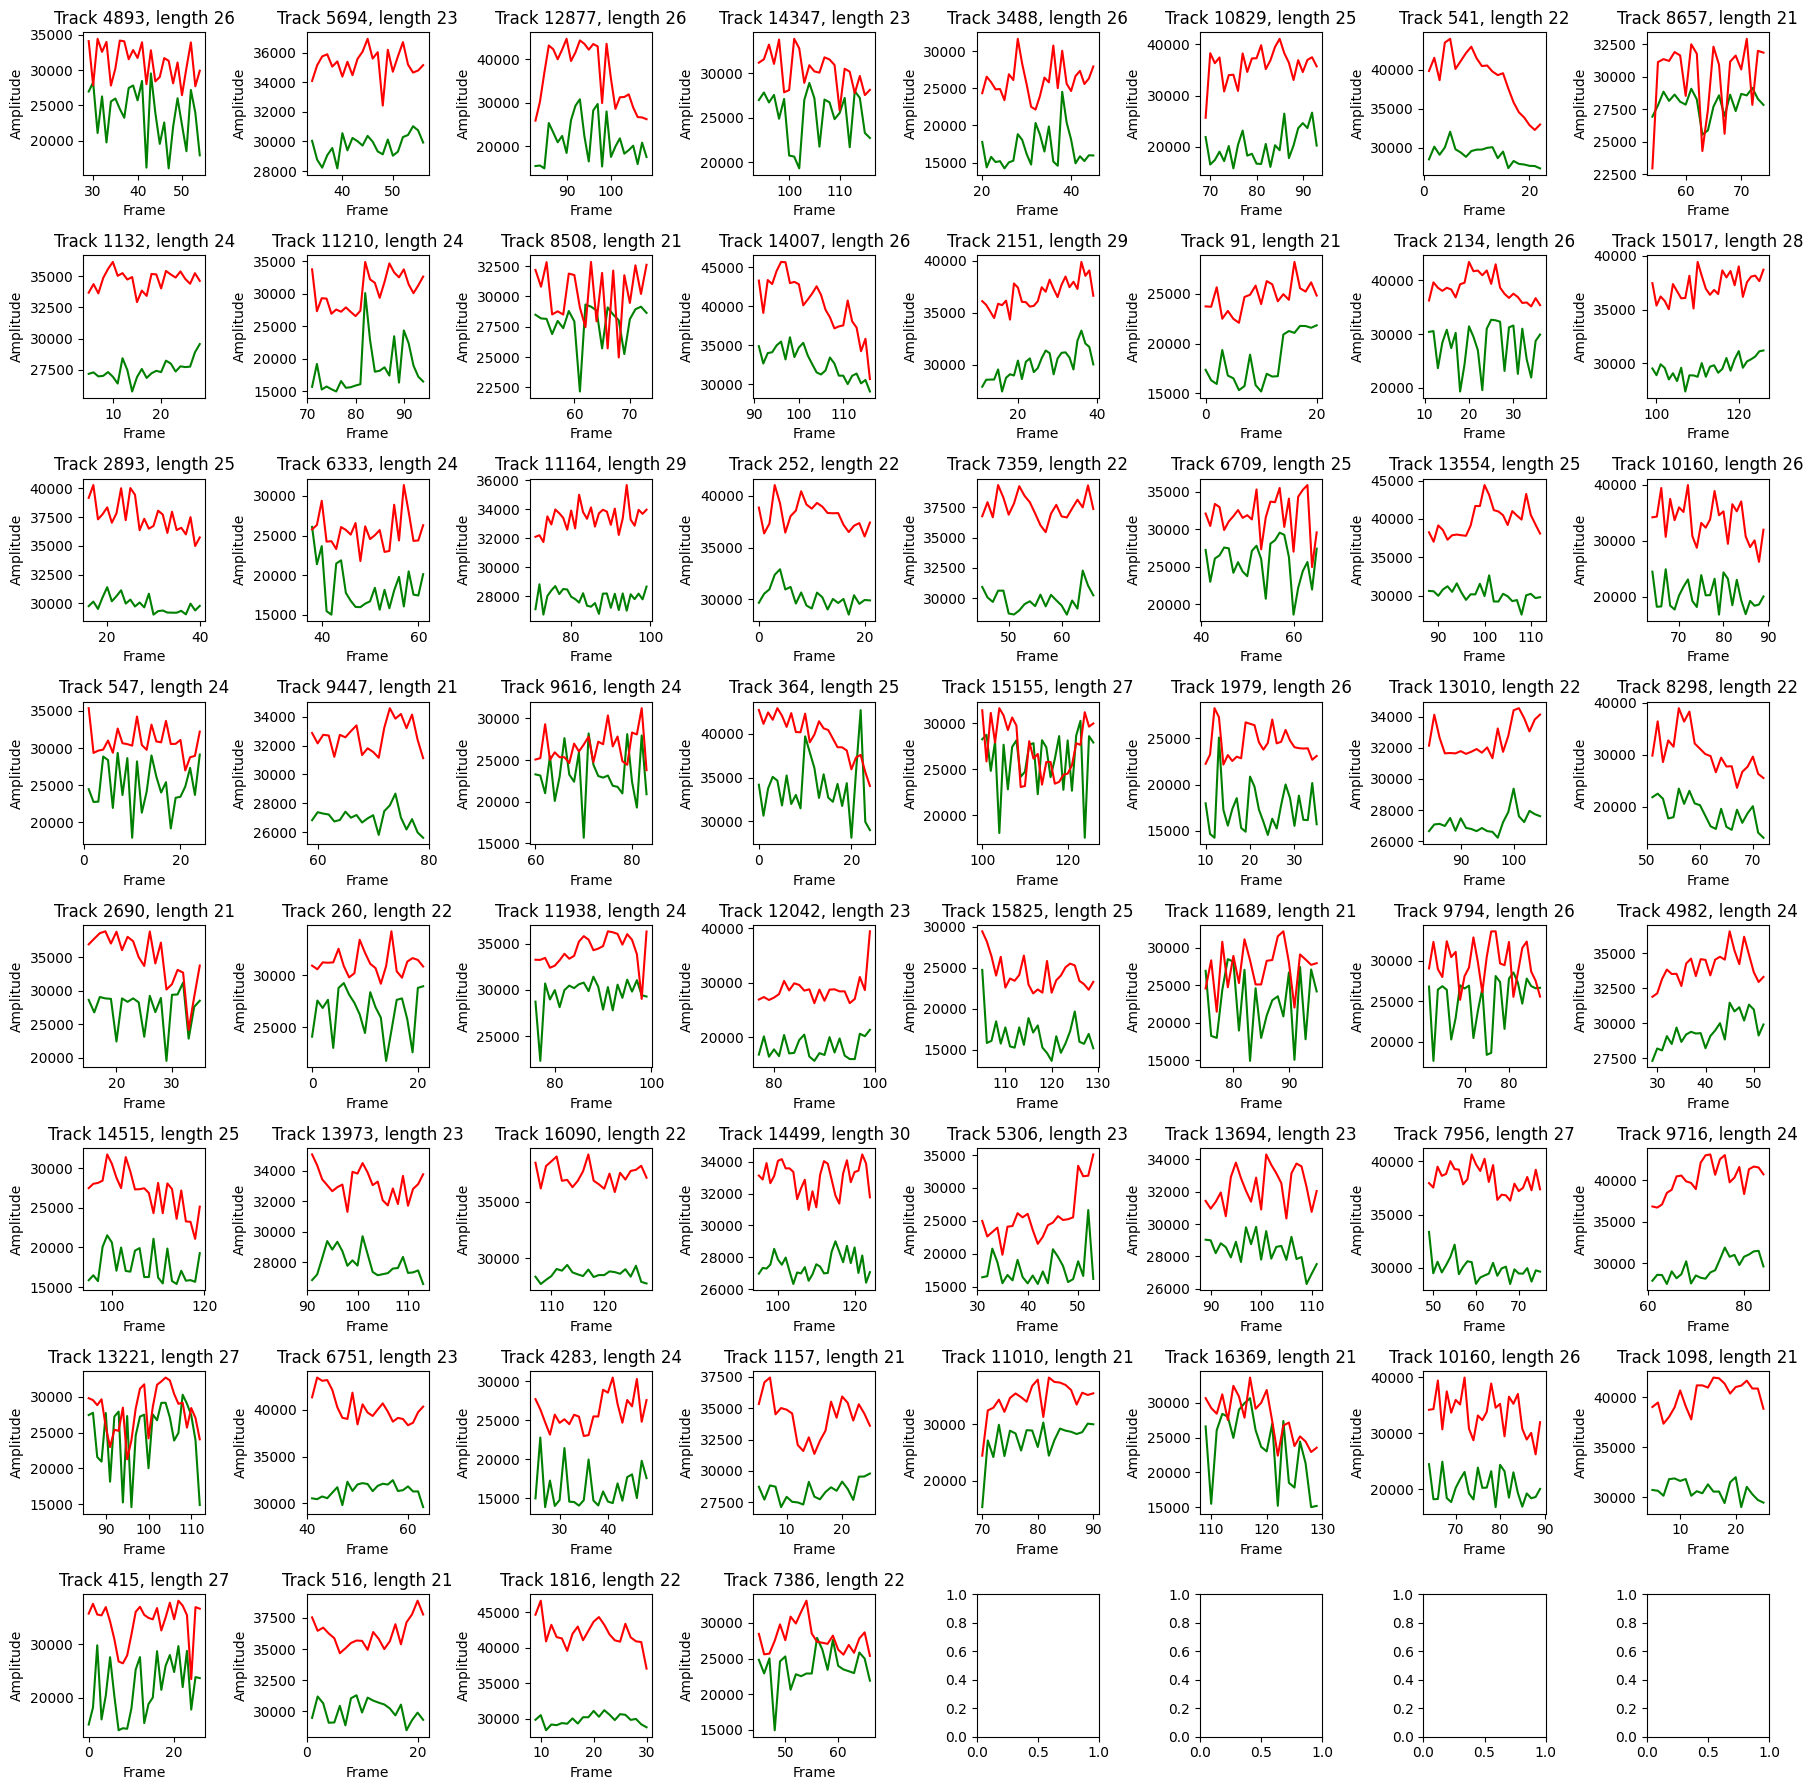

In [14]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_medium):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_voxel_sum'], label='c2_voxel', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_voxel_sum'], label='c3_voxel', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# For tracks with lengths 31-40

In [15]:
selected_tracks_long = random_track_ids(filtered_tracks, desired_length = [31,40], num_to_select=64)
print(len(selected_tracks_long))

17


# Peaks

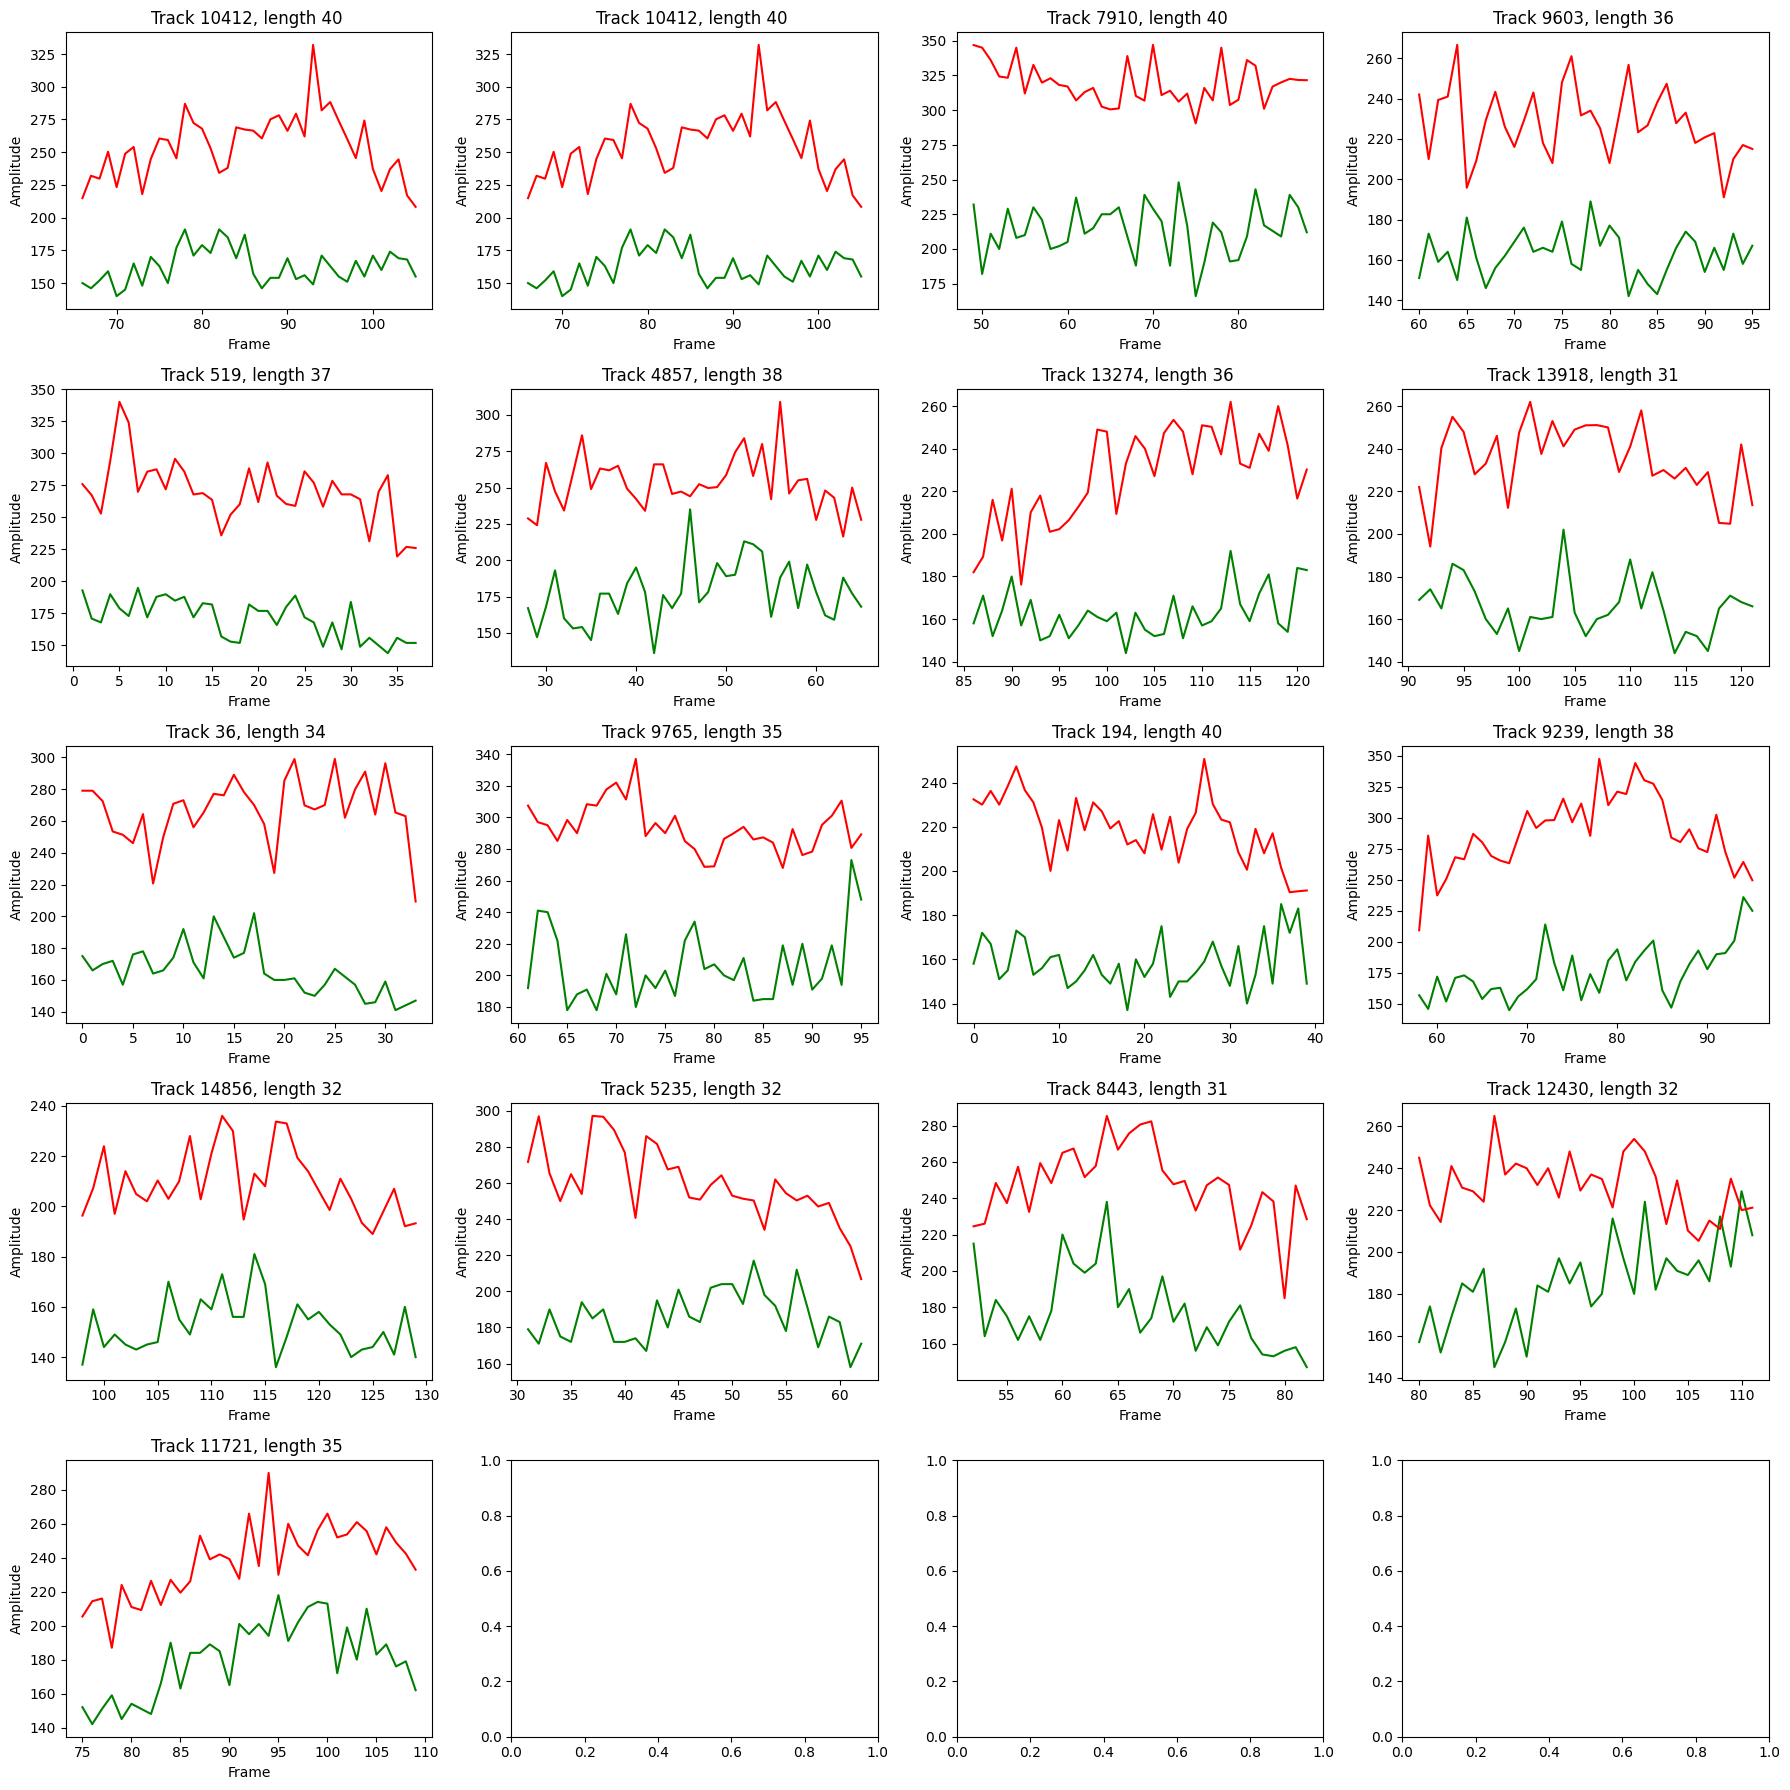

In [16]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_long):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_peak'], label='c2_peak', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['amplitude'], label='c3_peak', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]} ')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Means 

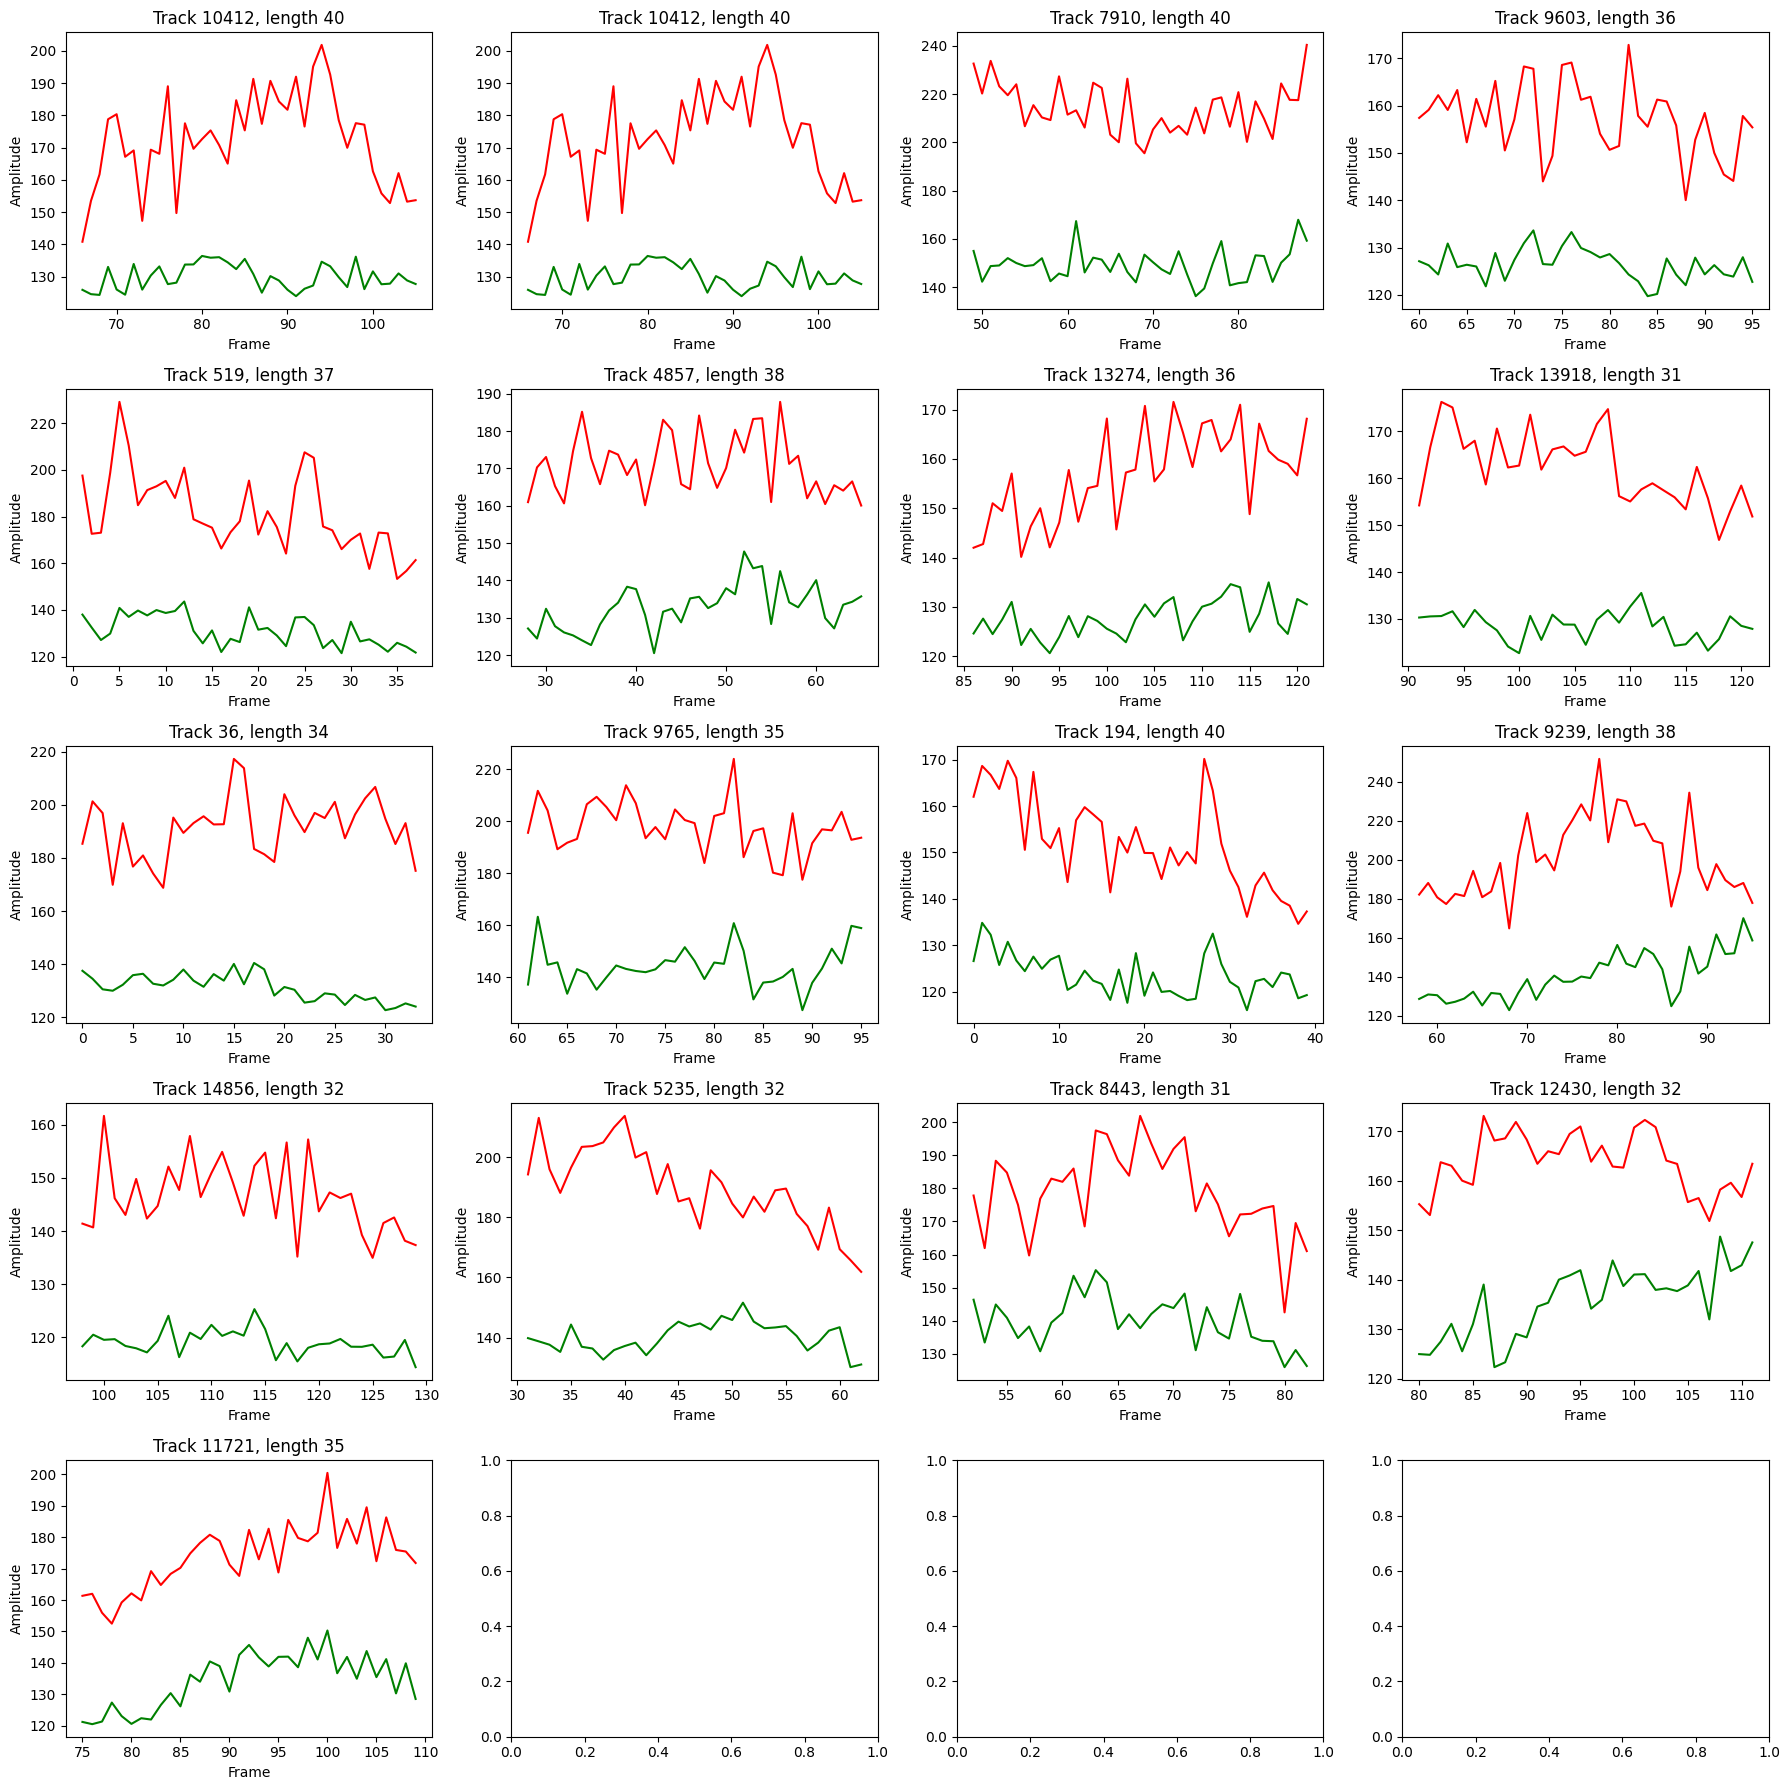

In [17]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_long):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Voxel Sums 

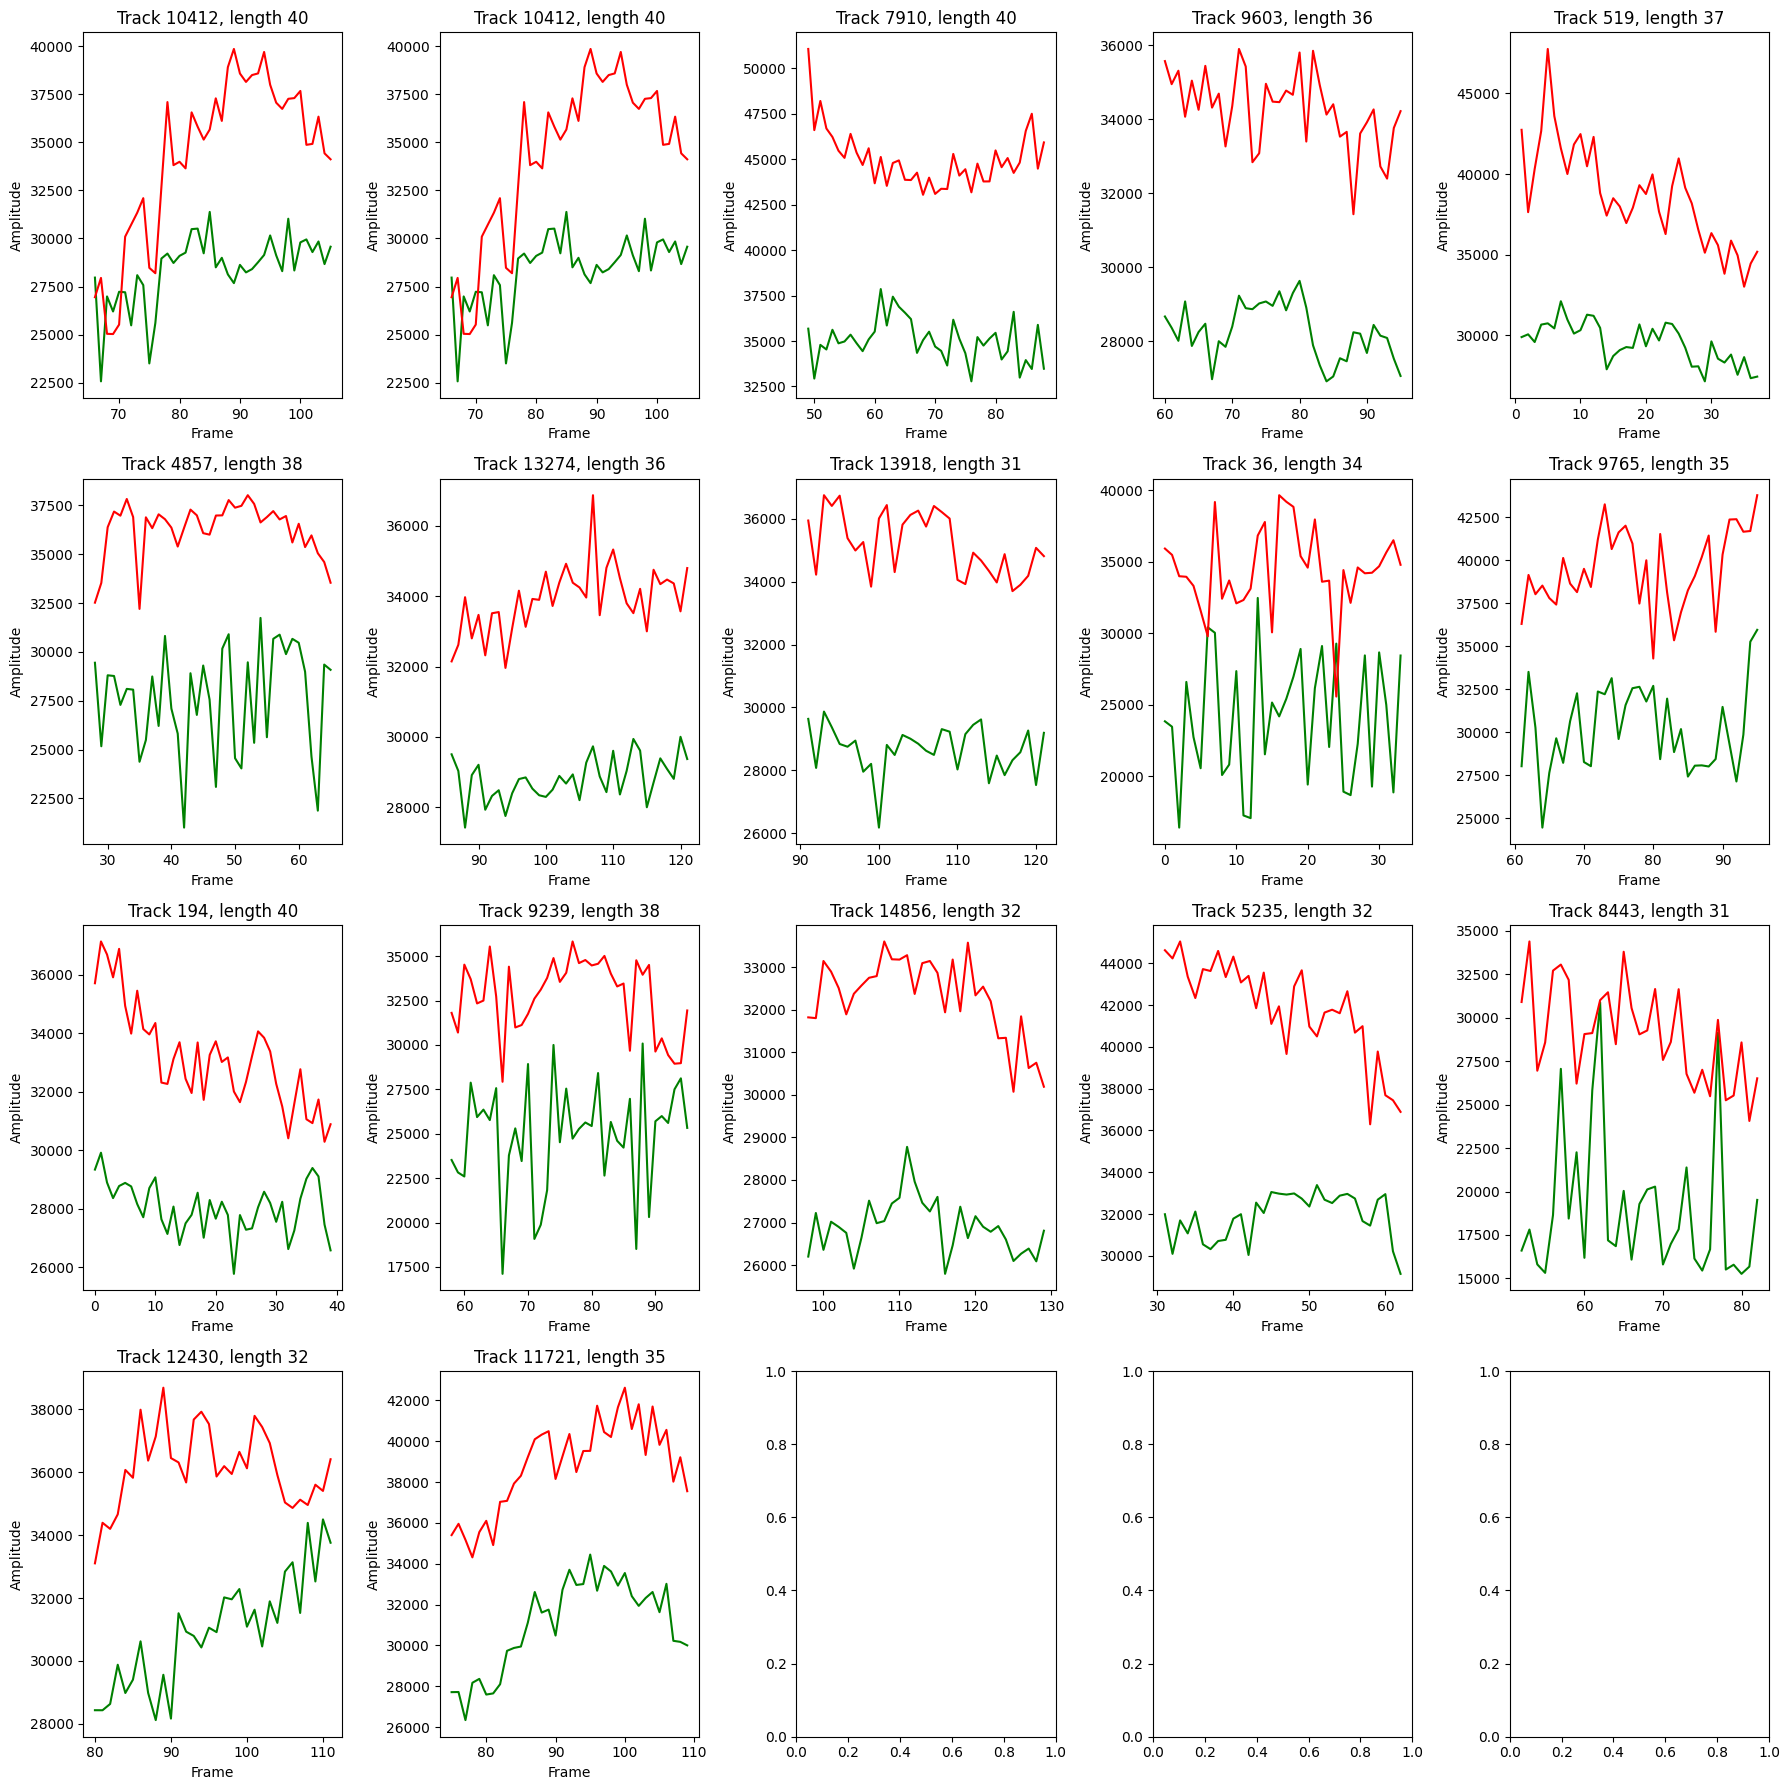

In [18]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 4
num_cols = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_long):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_voxel_sum'], label='c2_voxel', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_voxel_sum'], label='c3_voxel', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
